<a href="https://www.kaggle.com/code/daianazer/nyc-food-orders-deliveries-analysis?scriptVersionId=117799545" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-ordering-and-delivery-app-dataset/food_order.csv


In [2]:
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
data = pd.read_csv('/kaggle/input/food-ordering-and-delivery-app-dataset/food_order.csv')
df=pd.DataFrame(data)

First of all, in order to analyze a dataset, we need to make sure the relevant libraries have been imported.

To use pandas and analyze the data, I need to structure my data (DataFrame) 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Using info() allows me to get an idea of how is build my database. 

Here we can see that we have 9 columns, the datatype of each one, and how many rows (1898).

In [4]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


The describe() method will show me general statistics of the table like the average, the sum, minimum value, maximum value, the stadard deviation, & more... for columns that have numbers as data and not words.

In [5]:
nan_values = df[df.isna().any(axis=1)]
nan_values

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


With the nan_values, I am checking if there is any empty data.

Here, we can see that we have no null entries.

In [6]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


With head() we can the the first rows of the database.

In [7]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


With tail() we can see last rows of the table.

In [8]:
df.sort_values(by='cost_of_the_order', ascending=False)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29
1646,1477665,231061,Han Dynasty,Chinese,34.19,Weekday,Not given,21,31
1762,1477700,60039,Blue Ribbon Sushi,Japanese,33.37,Weekday,3,30,27
1831,1476970,275689,Nobu Next Door,Japanese,33.37,Weekend,4,32,21
1370,1478329,116992,Tres Carnes,Mexican,33.32,Weekday,4,21,33
...,...,...,...,...,...,...,...,...,...
82,1477790,133617,Shake Shack,American,4.75,Weekday,4,35,28
1569,1477786,145389,RedFarm Hudson,Chinese,4.75,Weekend,3,23,25
542,1477788,270444,P.J. Clarke's,American,4.71,Weekend,Not given,23,15
480,1476877,53289,The Loop,Japanese,4.66,Weekend,Not given,34,25


Here, I just sorted my data by the cost of the order order by descending, it means that we see the higher cost first. 

Now, we want to start to analyze the database. 
So let's see how many different food types are in the table.

In [9]:
df.groupby("cuisine_type").ngroups

14

In [10]:
df.groupby("cuisine_type").size()

cuisine_type
American          584
Chinese           215
French             18
Indian             73
Italian           298
Japanese          470
Korean             13
Mediterranean      46
Mexican            77
Middle Eastern     49
Southern           17
Spanish            12
Thai               19
Vietnamese          7
dtype: int64

We have 14 different groups of food types and here we can see how many order per food type. 

In New York, people tends to prefer American food since this food type has the higher amount of orders.

So for now, we will focus on the American type to have general information.

The average cost of order for this type is:

In [11]:
df.groupby("cuisine_type").get_group("American")[['cost_of_the_order']].mean()

cost_of_the_order    16.319829
dtype: float64

The total cost of orders for American food in NYC:

In [12]:
df.groupby("cuisine_type").get_group("American")[['cost_of_the_order']].sum()

cost_of_the_order    9530.78
dtype: float64

The minimum amount of order is:

In [13]:
df.groupby("cuisine_type").get_group("American")[['cost_of_the_order']].min()

cost_of_the_order    4.71
dtype: float64

The maximum cost of order is:

In [14]:
df.groupby("cuisine_type").get_group("American")[['cost_of_the_order']].max()

cost_of_the_order    33.18
dtype: float64

The median price of order for American food is:

In [15]:
df.groupby("cuisine_type").get_group("American")[['cost_of_the_order']].median()

cost_of_the_order    14.12
dtype: float64

The standard deviation for this type is:

In [16]:
df.groupby("cuisine_type").get_group("American")[['cost_of_the_order']].std()

cost_of_the_order    7.46229
dtype: float64

How many orders have been done in NYC for American food?

In [17]:
df["cuisine_type"].value_counts()[["American"]]

American    584
Name: cuisine_type, dtype: int64

As we can see in the table, we have two different entries in the day of the week column: Weekend and Weekday.
Now in order to have a better view on the orders made during weekend vs weekday, we start by separating the orders: 
1. Separate by Weekend:

In [18]:
df.groupby("day_of_the_week").get_group("Weekend")

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22
...,...,...,...,...,...,...,...,...,...
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


Now we have all the orders ordered during the weekend.

2. Separat by Weekday:

In [19]:
df.groupby("day_of_the_week").get_group("Weekday")

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
...,...,...,...,...,...,...,...,...,...
1878,1477194,62540,Blue Ribbon Sushi,Japanese,5.92,Weekday,Not given,27,31
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


We can see that most of th orders have been done on Weekend. 1351 (Weekend) vs 547 orders made on Weekday.

Now, let's start visualization of our data to understand it.

Text(0, 0.5, '# of orders')

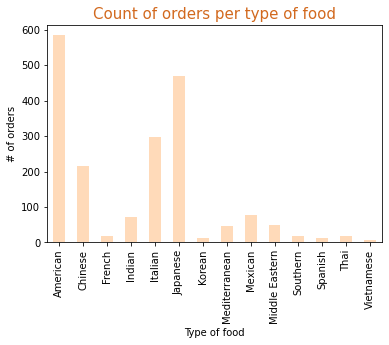

In [20]:
df.cuisine_type.value_counts().sort_index().plot(kind="bar", color='peachpuff')
plt.title("Count of orders per type of food", loc="center", fontsize=15,color='chocolate')
plt.xlabel("Type of food")
plt.ylabel("# of orders")

With this bar graph, we can see the count of order per type of food, like we did before with df.groupby("cuisine_type").size()

Now, we want to see the representation of the orders made on Weekend vs Weekday.

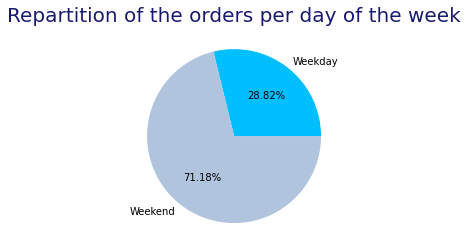

In [21]:
df.day_of_the_week.value_counts().sort_index().plot.pie(autopct="%.2f%%", colors = ['deepskyblue', 'lightsteelblue'] )
plt.title("Repartition of the orders per day of the week",loc ="center" ,fontsize=20,color='midnightblue')

frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)

With this pie chart, it is simple to see that 71.18% of all the orders done (all type food) are done on Weekend and only 28.82% on Weekday.

Now we want to know the average preparation time of the food during Weekend VS Weekday.
For this step, we need to define a new variable to prepare our data again:

In [22]:
val = df.groupby(["cuisine_type","day_of_the_week"])["food_preparation_time"].mean().to_frame()
val

food_preparation_time
cuisine_type   day_of_the_week                       
American       Weekday                      27.408284
               Weekend                      27.453012
Chinese        Weekday                      28.076923
               Weekend                      27.331288
French         Weekday                      27.200000
               Weekend                      26.769231
Indian         Weekday                      26.333333
               Weekend                      27.489796
Italian        Weekday                      27.417582
               Weekend                      27.512077
Japanese       Weekday                      27.281481
               Weekend                      27.602985
Korean         Weekday                      23.000000
               Weekend                      25.909091
Mediterranean  Weekday                      25.785714
               Weekend                      27.531250
Mexican        Weekday                      25.625000
               Weekend                      27.226415
Middle Eastern Weekday                      27.235294
               Weekend                      26.375000
Southern       Weekday                      26.166667
               Weekend                      28.363636
Spanish        Weekday                      33.000000
               Weekend                      26.363636
Thai           Weekday                      25.250000
               Weekend                      27.866667
Vietnamese     Weekday                      23.666667
               Weekend                      27.250000

We need to organize the data:

In [23]:
val.unstack()

food_preparation_time           
day_of_the_week               Weekday    Weekend
cuisine_type                                    
American                    27.408284  27.453012
Chinese                     28.076923  27.331288
French                      27.200000  26.769231
Indian                      26.333333  27.489796
Italian                     27.417582  27.512077
Japanese                    27.281481  27.602985
Korean                      23.000000  25.909091
Mediterranean               25.785714  27.531250
Mexican                     25.625000  27.226415
Middle Eastern              27.235294  26.375000
Southern                    26.166667  28.363636
Spanish                     33.000000  26.363636
Thai                        25.250000  27.866667
Vietnamese                  23.666667  27.250000

In [24]:
val.unstack().rename(columns={0:"Weekday",1:"Weekend"})

food_preparation_time           
day_of_the_week               Weekday    Weekend
cuisine_type                                    
American                    27.408284  27.453012
Chinese                     28.076923  27.331288
French                      27.200000  26.769231
Indian                      26.333333  27.489796
Italian                     27.417582  27.512077
Japanese                    27.281481  27.602985
Korean                      23.000000  25.909091
Mediterranean               25.785714  27.531250
Mexican                     25.625000  27.226415
Middle Eastern              27.235294  26.375000
Southern                    26.166667  28.363636
Spanish                     33.000000  26.363636
Thai                        25.250000  27.866667
Vietnamese                  23.666667  27.250000

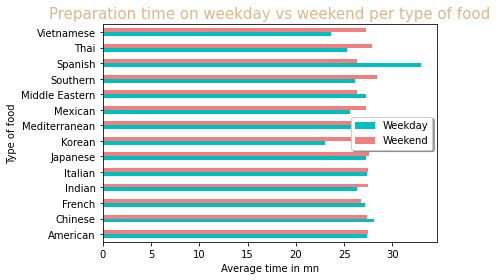

In [25]:
val.unstack().rename(columns={0:"Weekday",1:"Weekend"}).plot(kind="barh",color=['c','lightcoral'])
plt.title("Preparation time on weekday vs weekend per type of food",loc ="center" ,fontsize=15,color='burlywood')
plt.ylabel("Type of food")
plt.xlabel("Average time in mn")
plt.legend(['Weekday','Weekend'], loc="center right", shadow=True, frameon=True, facecolor="white")

With this type of graph, we can see the differences of the food preparation time between Weekend/Weekday for each category of food.

As we can see, the Spanish food takes the longest average preparation time: more than 30 minutes during the weekend.


For the next step, we want to know which category of food generates the highest revenue:

-> creation of a loop: for each type of food, we want to know the sum of all the cost of orders relevants to the category:

In [26]:
all_types = df.cuisine_type.unique()
sums = {"type": all_types, "sum": []}
for food_type in all_types:
    sums["sum"].append(df.groupby("cuisine_type").get_group(food_type)['cost_of_the_order'].sum().round())
sum_df = pd.DataFrame.from_dict(sums)
sum_df

,type,sum
0,Korean,182.0
1,Japanese,7663.0
2,Mexican,1304.0
3,American,9531.0
4,Indian,1235.0
5,Italian,4893.0
6,Mediterranean,712.0
7,Chinese,3506.0
8,Middle Eastern,922.0
9,Thai,365.0


Creation of a scatter graph to see the differences in the sum of the costs per type of food.

Text(0.5, 1.0, 'Total cost of orders per type of food')

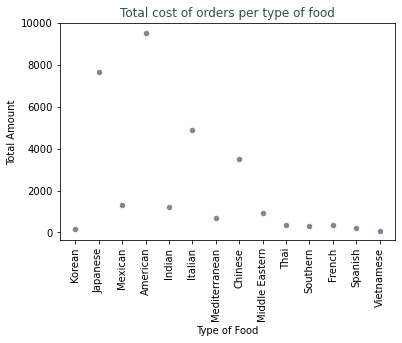

In [27]:
sum_df.plot(kind="scatter",x="type",y="sum", color='lightslategrey')
plt.xlabel('Type of Food')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.title("Total cost of orders per type of food", color='darkslategrey')


As we can see, the category that generates the most money is the American food, and the last one, with the least revenue is the Vietnamese category.

Last but not least, we want to compare the revenue generated by each category of food during Weekend VS Weekday.

In [28]:
newval=df.groupby(["cuisine_type","day_of_the_week"])["cost_of_the_order"].sum()
newval

cuisine_type    day_of_the_week
American        Weekday            2587.11
                Weekend            6943.67
Chinese         Weekday             891.68
                Weekend            2613.94
French          Weekday             104.33
                Weekend             251.96
Indian          Weekday             411.90
                Weekend             823.24
Italian         Weekday            1537.00
                Weekend            3355.77
Japanese        Weekday            2209.69
                Weekend            5453.44
Korean          Weekday              24.36
                Weekend             157.66
Mediterranean   Weekday             196.56
                Weekend             515.28
Mexican         Weekday             397.34
                Weekend             906.51
Middle Eastern  Weekday             337.16
                Weekend             585.05
Southern        Weekday             115.36
                Weekend             212.75
Spanish         Weekda

In [29]:
newval.unstack()

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,2587.11,6943.67
Chinese,891.68,2613.94
French,104.33,251.96
Indian,411.90,823.24
Italian,1537.00,3355.77
Japanese,2209.69,5453.44
Korean,24.36,157.66
Mediterranean,196.56,515.28
Mexican,397.34,906.51


In [30]:
newval.unstack().rename(columns={0:"Weekday",1:"Weekend"})

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,2587.11,6943.67
Chinese,891.68,2613.94
French,104.33,251.96
Indian,411.90,823.24
Italian,1537.00,3355.77
Japanese,2209.69,5453.44
Korean,24.36,157.66
Mediterranean,196.56,515.28
Mexican,397.34,906.51


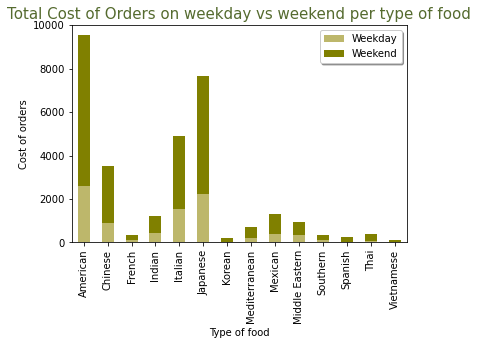

In [31]:
newval.unstack().rename(columns={0:"Weekday",1:"Weekend"}).plot(kind="bar", stacked=True, color=['darkkhaki','olive'])
plt.title("Total Cost of Orders on weekday vs weekend per type of food",loc ="center" ,fontsize=15,color='darkolivegreen')
plt.ylabel("Cost of orders")
plt.xlabel("Type of food")
plt.legend(loc="best", shadow=True, frameon=True, facecolor="white")

This graph shows us the gaps betweens categories. 
Without surprise, American food generates more money than any other category of food and this category breaks records during Weekends with a total revenue of almolst $ 7k.

The Japanese category is at the second place with a total revenue of almonst $ 5.5K. 